In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [3]:
dataset = pd.read_csv('C:\\Users\\Mayank\\Downloads\\S01 - Machine-Learning-A-Z-Codes-Datasets\\Machine-Learning-A-Z-Codes-Datasets\\Part 3 - Classification\Section 14 - Logistic Regression\\Python\\Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Handling Missing Data

In [7]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Splitting the dataset in Test and Training

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.fit_transform(x_test)

In [6]:
x_train

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926],
       [-0.56234321,  2.33980255],
       [ 1.0088136 , -1.19473064],
       [-0.75873781,  1.08372877],
       [ 2.1871812 , -1.04867555],
       [ 0.0268406 , -0.25997806],
       [-0.46414591, -1.1363086 ],
       [ 0.1250379 ,  0.03213212],
       [ 1.6961947 , -0.90262046],
       [ 1.1070109 , -0.90262046],
       [ 0.5178271 ,  1.22978386],
       [-1.05332971, -1.4576298 ],
       [-1.15152701, -1.54526286],
       [-0.0713567 ,  0.67477452],
       [ 0.4196298 , -0.46445519],
       [-0.2677513 , -0.25997806],
       [-0.85693511,  0.14897619],
       [ 0.0268406 ,  0.29503128],
       [ 0.7142217 , -1.28236369],
       [ 1.5979974 ,  1.11293979],
       [ 0.812419  , -1.36999675],
       [-1.44611891, -1.22394166],
       [-0.0713567 ,  0.14897619],
       [ 0.4196298 , -0.14313399],
       [-0.2677513 ,

Training the Logistic Regression model on the Training set

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

Predicting a new result

In [10]:
y_pred=model.predict(st.transform([[22,150000]]))# input will always come inside 2d array with features(22->age , 150000-> salary)

In [22]:
print(y_pred)

[0]


Predicting Test Result

In [11]:
y_pred=model.predict(x_test)

In [27]:
#print(np.column_stack((y_test, y_pred)))
result_comparision=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(result_comparision)

    Actual  Predicted
0        0          0
1        1          1
2        0          0
3        1          1
4        0          0
..     ...        ...
95       0          0
96       1          1
97       0          0
98       1          1
99       1          0

[100 rows x 2 columns]


C:\Users\Mayank\AppData\Local\Temp\ipykernel_7528\2112469571.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


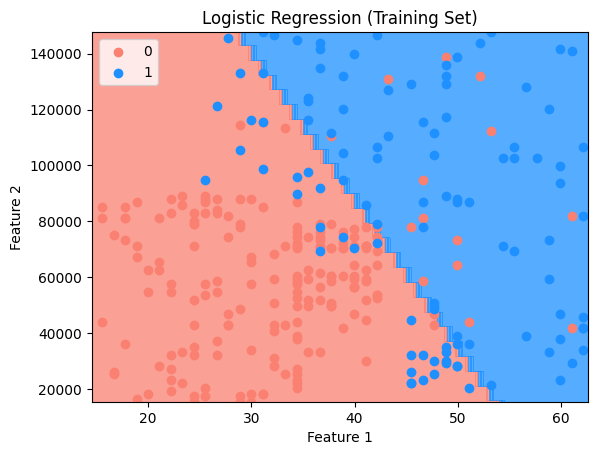

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Reverse feature scaling for better visualization
X_set, y_set = st.inverse_transform(x_train), y_train  

# Create a meshgrid covering the feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1)
)

# Predict the class for each point in the meshgrid
plt.contourf(
    X1, X2,
    model.predict(st.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(['#FA8072', '#1E90FF'])
)

# Set plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(['#FA8072', '#1E90FF'])(i), label=j
    )

# Labels and title
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Feature 1')  # Change to your actual feature name
plt.ylabel('Feature 2')  # Change to your actual feature name
plt.legend()
plt.show()



Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61  2]
 [12 25]]


0.86